In [1]:
# Test 3-1 Dataset 3 v2
# This test uses the new dataset 16000 images
# This test uses a simple CNN to classify between having an Square or a Circle

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-17 12:39:08.280680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 12:39:08.280705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 12:39:08.281752: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-17 12:39:08.287181: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 12:39:08.992277: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_3_1/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_3_1/test'

In [4]:
IMG_SIZE = 250
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

832


In [5]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
    )

Found 11000 files belonging to 2 classes.


2024-04-17 12:39:10.017890: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 12:39:10.018081: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 12:39:10.018191: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


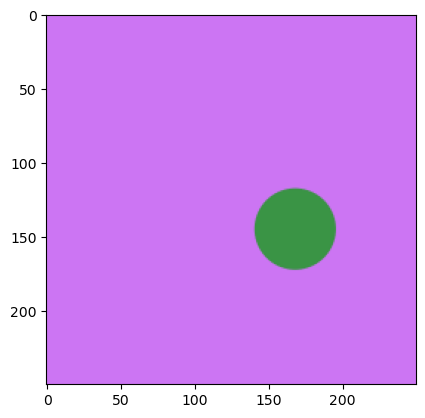

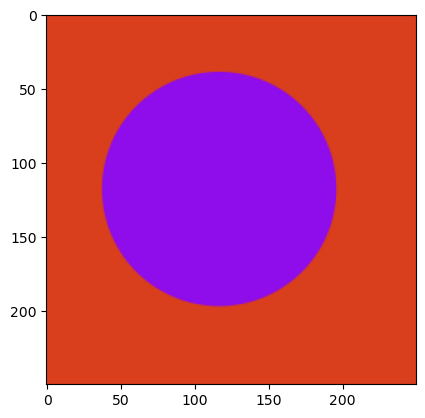

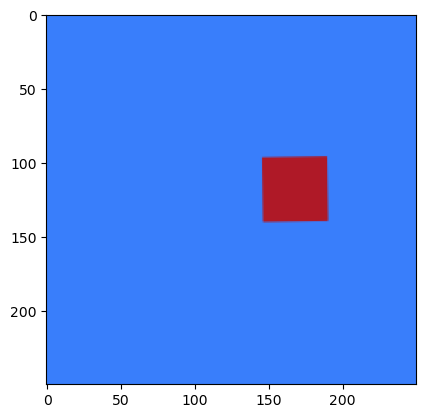

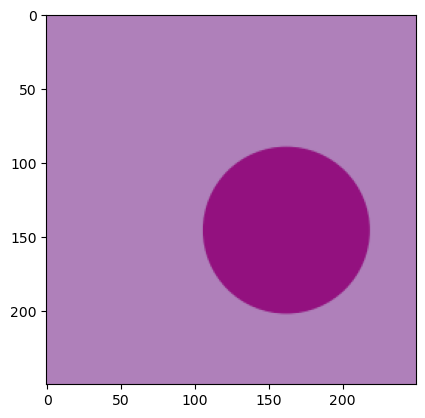

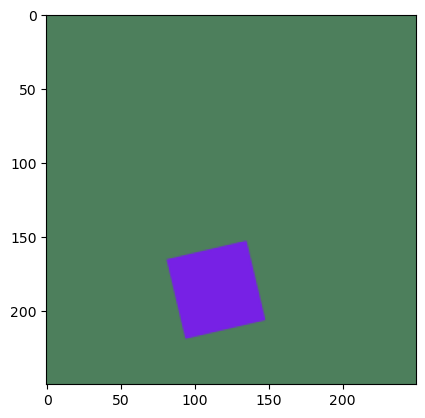

In [6]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [7]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
checkpoint_filepath = 'models/3-1.1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [10]:
#Best Epoch = ?

history = model.fit(train_dataset, epochs=30, batch_size=32, validation_data=test_dataset, callbacks=[callbacks,early_stop])

Epoch 1/30


2024-04-17 12:39:14.392247: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-17 12:39:14.482068: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-17 12:39:15.503079: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8af88f7140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-17 12:39:15.503106: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-17 12:39:15.507190: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713353955.544649   11215 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


344/344 [==============================] - ETA: 0s - loss: 0.6088 - acc: 0.6428
Epoch 1: val_loss improved from inf to 0.54597, saving model to models/3-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-001.ckpt/assets


344/344 [==============================] - 28s 67ms/step - loss: 0.6088 - acc: 0.6428 - val_loss: 0.5460 - val_acc: 0.7126
Epoch 2/30
343/344 [============================>.] - ETA: 0s - loss: 0.5327 - acc: 0.7177
Epoch 2: val_loss improved from 0.54597 to 0.51286, saving model to models/3-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-002.ckpt/assets


344/344 [==============================] - 21s 61ms/step - loss: 0.5329 - acc: 0.7173 - val_loss: 0.5129 - val_acc: 0.7386
Epoch 3/30
343/344 [============================>.] - ETA: 0s - loss: 0.4867 - acc: 0.7534
Epoch 3: val_loss improved from 0.51286 to 0.47720, saving model to models/3-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-003.ckpt/assets


344/344 [==============================] - 20s 59ms/step - loss: 0.4869 - acc: 0.7532 - val_loss: 0.4772 - val_acc: 0.7584
Epoch 4/30
344/344 [==============================] - ETA: 0s - loss: 0.4373 - acc: 0.7843
Epoch 4: val_loss improved from 0.47720 to 0.42651, saving model to models/3-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-004.ckpt/assets


344/344 [==============================] - 21s 60ms/step - loss: 0.4373 - acc: 0.7843 - val_loss: 0.4265 - val_acc: 0.7962
Epoch 5/30
344/344 [==============================] - ETA: 0s - loss: 0.3789 - acc: 0.8193
Epoch 5: val_loss improved from 0.42651 to 0.40110, saving model to models/3-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-005.ckpt/assets


344/344 [==============================] - 20s 58ms/step - loss: 0.3789 - acc: 0.8193 - val_loss: 0.4011 - val_acc: 0.8184
Epoch 6/30
344/344 [==============================] - ETA: 0s - loss: 0.3064 - acc: 0.8649
Epoch 6: val_loss improved from 0.40110 to 0.29505, saving model to models/3-1/ch-006.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-006.ckpt/assets


344/344 [==============================] - 20s 59ms/step - loss: 0.3064 - acc: 0.8649 - val_loss: 0.2950 - val_acc: 0.8676
Epoch 7/30
343/344 [============================>.] - ETA: 0s - loss: 0.2308 - acc: 0.9004
Epoch 7: val_loss improved from 0.29505 to 0.25772, saving model to models/3-1/ch-007.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-007.ckpt/assets


344/344 [==============================] - 21s 60ms/step - loss: 0.2308 - acc: 0.9005 - val_loss: 0.2577 - val_acc: 0.8882
Epoch 8/30
343/344 [============================>.] - ETA: 0s - loss: 0.1797 - acc: 0.9286
Epoch 8: val_loss improved from 0.25772 to 0.21356, saving model to models/3-1/ch-008.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-008.ckpt/assets


344/344 [==============================] - 21s 60ms/step - loss: 0.1796 - acc: 0.9287 - val_loss: 0.2136 - val_acc: 0.9140
Epoch 9/30
343/344 [============================>.] - ETA: 0s - loss: 0.1394 - acc: 0.9444
Epoch 9: val_loss improved from 0.21356 to 0.17069, saving model to models/3-1/ch-009.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-009.ckpt/assets


344/344 [==============================] - 22s 62ms/step - loss: 0.1395 - acc: 0.9445 - val_loss: 0.1707 - val_acc: 0.9308
Epoch 10/30
344/344 [==============================] - ETA: 0s - loss: 0.1117 - acc: 0.9555
Epoch 10: val_loss improved from 0.17069 to 0.16844, saving model to models/3-1/ch-010.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-010.ckpt/assets


344/344 [==============================] - 22s 62ms/step - loss: 0.1117 - acc: 0.9555 - val_loss: 0.1684 - val_acc: 0.9320
Epoch 11/30
343/344 [============================>.] - ETA: 0s - loss: 0.0918 - acc: 0.9666
Epoch 11: val_loss improved from 0.16844 to 0.14814, saving model to models/3-1/ch-011.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-011.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-011.ckpt/assets


344/344 [==============================] - 22s 62ms/step - loss: 0.0917 - acc: 0.9666 - val_loss: 0.1481 - val_acc: 0.9414
Epoch 12/30
344/344 [==============================] - ETA: 0s - loss: 0.0715 - acc: 0.9735
Epoch 12: val_loss did not improve from 0.14814
344/344 [==============================] - 21s 61ms/step - loss: 0.0715 - acc: 0.9735 - val_loss: 0.1553 - val_acc: 0.9414
Epoch 13/30
344/344 [==============================] - ETA: 0s - loss: 0.0598 - acc: 0.9783
Epoch 13: val_loss improved from 0.14814 to 0.13450, saving model to models/3-1/ch-013.ckpt
INFO:tensorflow:Assets written to: models/3-1/ch-013.ckpt/assets


INFO:tensorflow:Assets written to: models/3-1/ch-013.ckpt/assets


344/344 [==============================] - 23s 68ms/step - loss: 0.0598 - acc: 0.9783 - val_loss: 0.1345 - val_acc: 0.9472
Epoch 14/30
343/344 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9822
Epoch 14: val_loss did not improve from 0.13450
344/344 [==============================] - 22s 63ms/step - loss: 0.0494 - acc: 0.9823 - val_loss: 0.1446 - val_acc: 0.9484
Epoch 15/30
344/344 [==============================] - ETA: 0s - loss: 0.0389 - acc: 0.9866
Epoch 15: val_loss did not improve from 0.13450
344/344 [==============================] - 22s 63ms/step - loss: 0.0389 - acc: 0.9866 - val_loss: 0.1491 - val_acc: 0.9482
Epoch 16/30
344/344 [==============================] - ETA: 0s - loss: 0.0324 - acc: 0.9886
Epoch 16: val_loss did not improve from 0.13450
344/344 [==============================] - 21s 60ms/step - loss: 0.0324 - acc: 0.9886 - val_loss: 0.1539 - val_acc: 0.9478
Epoch 17/30
344/344 [==============================] - ETA: 0s - loss: 0.0259 - acc: 0.9

In [11]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

157/157 [==============================] - 4s 23ms/step - loss: 0.1921 - acc: 0.9564
0.1921404004096985 0.9563999772071838


In [ ]:
model = keras.models.load_model('models/3-1.1/31-E.keras')

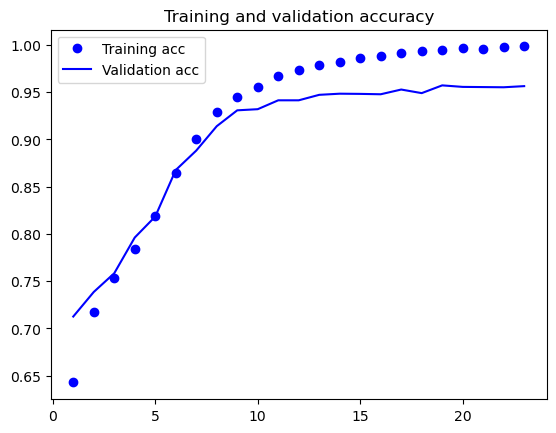

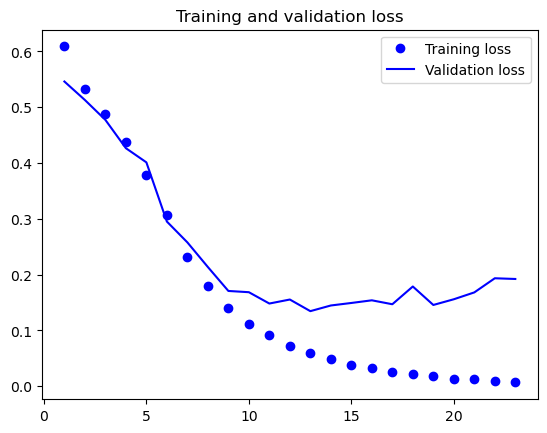

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/3-1.1/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/3-1.1/train_test_acc",dpi=100)
plt.show()


In [13]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/square/square_309.png', target_size=(IMG_SIZE, IMG_SIZE))

FileNotFoundError: [Errno 2] No such file or directory: '../../Generator/Dataset_B/test/square/square_309.png'

In [ ]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/none/none_1.png', target_size=(IMG_SIZE, IMG_SIZE))

In [ ]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

In [15]:
import csv
with open('results/3-1.1/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])

1/1 [==============================] - 0s 69ms/step


In [17]:
with open('results/3-1.1/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

['Index', 'Label', 'Prediction']
['18', '0', '1']
['171', '1', '0']
['274', '0', '1']
['300', '1', '0']
['318', '1', '0']
['348', '0', '1']
['358', '1', '0']
['375', '1', '0']
['439', '0', '1']
['502', '0', '1']
['533', '0', '1']
['545', '0', '1']
['564', '0', '1']
['613', '0', '1']
['655', '0', '1']
['699', '1', '0']
['702', '0', '1']
['713', '0', '1']
['749', '0', '1']
['856', '1', '0']
['920', '0', '1']
['954', '1', '0']
['995', '1', '0']
['999', '1', '0']
['1032', '1', '0']
['1034', '1', '0']
['1045', '1', '0']
['1056', '1', '0']
['1103', '0', '1']
['1109', '0', '1']
['1124', '0', '1']
['1130', '1', '0']
['1149', '0', '1']
['1170', '1', '0']
['1202', '1', '0']
['1207', '0', '1']
['1214', '0', '1']
['1236', '0', '1']
['1293', '0', '1']
['1302', '0', '1']
['1421', '1', '0']
['1427', '1', '0']
['1441', '1', '0']
['1454', '1', '0']
['1468', '0', '1']
['1474', '0', '1']
['1489', '0', '1']
['1504', '0', '1']
['1565', '1', '0']
['1630', '0', '1']
['1649', '0', '1']
['1670', '0', '1']
['16

In [13]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 5000 files belonging to 2 classes.
1/1 [==============================] - 0s 16ms/step
5000
0
219


In [15]:
# write the wrong filenames to a file
with open('results/3-1.1/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [18]:
import csv
import os

output_csv = 'results/3-1.1/failed_squares.csv'
failed_filenames_txt = 'results/3-1.1/failed_filenames.txt'
source_file = '../../Dataset_Scripts/Datasets/Dataset_3_1/data/squares.csv'

# Extract short filenames from failed_filenames.txt
failed_filenames = set()
with open(failed_filenames_txt, 'r') as f1:
    for line in f1:
        filename = os.path.basename(line.strip())  # Get short filename
        failed_filenames.add(filename)

# Open output CSV file for writing
out = open(output_csv, 'w', newline='')
out_writer = csv.writer(out)

# Iterate over rows in squares.csv
with open(source_file, 'r') as f:
    reader = csv.DictReader(f)
    # Write header to output CSV
    out_writer.writerow(reader.fieldnames)
    # Iterate over rows
    for row in reader:
        # Extract filename from the current row
        filename = os.path.basename(row['Filename'])
        # Check if filename is in the set of failed filenames
        if filename in failed_filenames:
            # Write the row to the output CSV
            out_writer.writerow(row.values())

# Close output CSV file
out.close()